In [1]:
from IPython.display import HTML
HTML("<iframe src=http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data width=300 height=200></iframe>")

In [9]:
import urllib2, csv
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = urllib2.urlopen(url)
cr = [[float(j) for j in i[:-1]] for i in csv.reader(response)] #First we cut off the last row (the identifier above)
                                                                #Then cast all the values to float
for row in cr[:10]: #Just print out first 10
    print row

[5.1, 3.5, 1.4, 0.2]
[4.9, 3.0, 1.4, 0.2]
[4.7, 3.2, 1.3, 0.2]
[4.6, 3.1, 1.5, 0.2]
[5.0, 3.6, 1.4, 0.2]
[5.4, 3.9, 1.7, 0.4]
[4.6, 3.4, 1.4, 0.3]
[5.0, 3.4, 1.5, 0.2]
[4.4, 2.9, 1.4, 0.2]
[4.9, 3.1, 1.5, 0.1]


In [12]:
from sklearn.datasets import load_iris

iris = load_iris()
print type(iris) #Or just do this
print iris.data[:10]

<class 'sklearn.datasets.base.Bunch'>
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]


In [13]:
print iris.feature_names
print iris.target
print iris.target_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [14]:
print iris.data.shape
print iris.target.shape

(150L, 4L)
(150L,)


In [15]:
x = iris.data
y = iris.target #Assign these to variables
# Next step is actually modelling!

In [19]:
from sklearn.neighbors import KNeighborsClassifier #First step is import the relevant class

In [20]:
knn = KNeighborsClassifier(n_neighbors=1) #Next, instantiate the estimator, which involves tuning parameter(s)

In [21]:
knn.fit(x, y) #Let the magic happen

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [25]:
import numpy as np
knn.predict(np.array([3, 5, 4, 2]).reshape(1, -1)) #Test the model with new observations (out-of-sample), using what the model learned
# (I have to do the reshape thing because something about something being depricated otherwise)
# The output, a numpy array with a value of 2 at index 0, correspondes to the species verginica, seen in iris.target_names[2]

array([2])

In [26]:
x_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(x_new) #Same thing, array of multiple samples (each with 4 features)

array([2, 1])

In [27]:
knn2 = KNeighborsClassifier(n_neighbors=5) #Can test with accuracy with different parameters
knn2.fit(x, y)
knn.predict(x_new) #Same results

array([2, 1])

In [38]:
#Or you can try with a completely new class/model type!
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() #You can print out logreg to view all the different parameters that could be changed
logreg.fit(x, y)
logreg.predict(x_new) #Different! We don't actually know which model is right

array([2, 0])

# Methods of Evaluating Models

## Evaluation Procedure 1: Test and Train on Whole Dataset

In [30]:
# LOGISTIC REGRESSION EXAMPLE
y_pred = logreg.predict(x) #Predict on the dataset using the model in cell above

### Next we need to classify the accuracy of this prediction

Sci-kit learn has some built-in stuff

In [31]:
from sklearn import metrics
print metrics.accuracy_score(y, y_pred) #Goal, predicted

#This is training accuracy - When you train and test a model on the same data

0.96


In [32]:
#Repeat for knn
y_pred_knn = knn.predict(x)
print metrics.accuracy_score(y, y_pred_knn) #Winner winner (if we only use data INSIDE the dataset)
#KNN with n_neighbor=1 has essentially memorized the training data, will always be completely accurate
#This means that the model overfits the data and learns the "noise" in a dataset, not the "signal"
#These models are usually overly complex and doesn't generalize trends found in data

1.0


![alt text](http://5047-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/05/05_overfitting-300x300.png)

In [33]:
#And knn2 (with n_neighbor=5), just for completion sake
y_pred_knn2 = knn2.predict(x)
print metrics.accuracy_score(y, y_pred_knn2)

0.966666666667


## Evalation Method 2: Train/test split

1. Split the data into two data sets, one to train and one to test
2. Train the model on the training data and test its accuracy on the testing data it has never seen before (out of sample data)

In [34]:
print x.shape #First number is number of samples, second number is # of features
print y.shape #Simply the number of samples

(150L, 4L)
(150L,)


In [35]:
from sklearn.cross_validation import train_test_split
# This will randomly split a dataset into training/testing
# Splits randomly so that the data can still be ordered and prevent training/testing not containing a classification

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=4) #test_size is percentage of total data

In [37]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_prod = logreg.predict(x_test) #Predict results with testing data
print metrics.accuracy_score(y_test, y_prod) #And measure the accuracy with what the testing data should be

0.883333333333


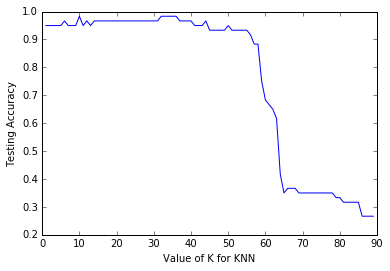

In [44]:
#Find the best k!
import matplotlib.pyplot as plt
scores = []
%matplotlib inline
k_range = range(1, 90)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_prod = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_prod))
    
plt.plot(k_range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy") #Huge dropoff at 50

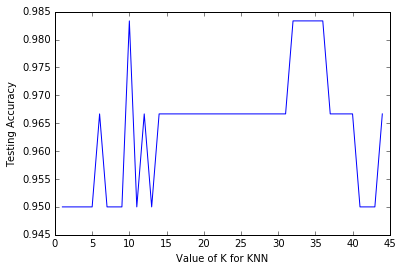

In [47]:
#Find the best k!
import matplotlib.pyplot as plt
scores = []
%matplotlib inline
k_range = range(1, 45)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_prod = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_prod))
    
plt.plot(k_range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

* Training accuracy increases as model complexity increases.
* Testing accuracy punishes models that are too complex or not complex enough
* For KNN, complexity is linearly related to K, so the goal is to find a balance for K that makes the model complex but not too complex

## Downsides to this split train/test method:

* Provides a high variance to out-of-sample accuracy, meaning that it depends a lot on the randomness of which samples are in testing vs training
* K-fold cross-validation overcomes this by repeatedly spliting the data and training/testing in a systematic way.
* This is still useful to to flexibility and speed